In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 8B: Aliasing Single Sine> <font color='blue'>Learning goal:</font> understand how and why aliasing occurs, learn how to cause aliasing and measure aliased signal. Understand how frequency, sampling frequency and Nyquist frequency are connected to aliasing.

Structure of an experiment:
- Background+Anticipate + Simulate (15+10+30 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (30+20 min): with your partner(group of 2)
- Compare + Conclude (20 min): with a group of 4(per table)

## BACKGROUND
> <font color='grey'>⏳ Estimated time: 15 min</font>

Have you ever seen a helicoptre on TV? You may have noticed that the wicks appear to rotate in a strange pattern. This effect is called aliasing.

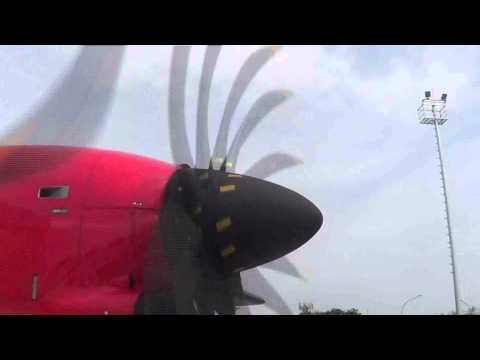

In [1]:
# aliasing with propellor
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ByTsISFXUoY', width = 600, height = 450)



Aliasing occurs when a periodic signal is sampled with a sampling frequency that is too low to capture the true signal. In the video, the camera was too slow to image the quickly rotating propeller. To explain the observed pattern, we will first briefly explain what sampling is.

### What is sampling?

The alternating voltage from you wall outlets is an analogue signal. We can think of it as a sine wave. This is a continuous signal with a frequency of 50 Hz.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ6-fig1.png" width=60%></img>

If we want to grasp this analogue signal in a digital environment, we will need to convert it. To do so, we measure the voltage at many timepoints with a fixed interval. Such a measurement is called a 'sample'. The sampling frequency (or sampling rate) is the frequency of these measurements. In the following image, we used a sampling frequency of 260 Hz. Since the analogue signal is 50 Hz, we have approximately 5 samples per period.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ6-fig2.png" width=60%></img>

If we let the computer connect all these samples, we retrieve a signal that looks reasonably similar to the original signal. This is called reconstruction. Good reconstruction is only possible if the sampling frequency is high enough.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ6-fig3.png" width=60%></img>

The process of reducing a continuous-time signal to a discrete-time one is called sampling. This is the first step for converting an analogue signal to a digital one. The second step (quantisation) is not so relevant for this part of the course.

$$
f_\text{Nyquist} = \frac{f_\text{sampling}}{2}
$$


You can explore aliasing on paper, by drawing sines and 'sampling' them. Follow the steps below, and see how sampling frequency and timing of sampling affect the reconstruction
* How will fourier spectrum look for 25Hz with sampling frequency 12Hz? Draw a picture or write down what happens.
* On paper, draw 5 identical signals below each other: three periods of a sine, starting at phase 0, amplitude 1.
* For each signal, sample in a different way:
    1. 4 points per period, start at phase 0
    2. 4 points per period, start at phase 45 degrees
    3. 2 points per period start at phase 0
    4. 2 points per period, start at phase 60
    5. 4 points per 3 periods, start at phase 0
* Which amplitude and frequency do you "measure" (draw a reconstruction - does it still look like a sine)? 
* Think whether the amplitude and phase you "measured" are correct


In [ ]:
from ipywidgets import FileUpload
from IPython.display import Image
import os 
upload=FileUpload()
upload


In [ ]:
file_name="8B_1_25hzspectrum.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
upload


In [ ]:
file_name="8B_2_reconstructed signals.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
### TO DO="your answers on the 'measured' amplitude and frequency, and whether this is similar to the input"


## ANTICIPATE: aliasing of a sine
> <font color='grey'>⏳ Estimated time: 10 min</font>

The widget below will help you understand aliasing. First try to predict what yoou think will happend and later check if you were right.
To run the simulation, you will need to copy paste the code you wrote last week in 7B that defines *calculate_fft* function. You will be using that function a lot, so maybe save it somewhere you can easily access.

The simulation will allow you to see the difference that sampling causes to digital signal and its fourier spectrum. See what happends when you are below, on (and on multiples) and above Nyquist frequency for your sampling (both for analog and digital signal). See what happends when your sampling freqency is more than 3 times lower. Try moving both of the sliders. Write down what you observe.

In [ ]:
#calculate_fft:

In [1]:
### TO DO="paste the calculate_fft code below"


In [2]:
#import IPython.html.widgets as widgets
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

def round_to_1(x):
    return np.round(x, -int(np.floor(np.log10(abs(x)))))

def smallest_nb_same_order(x):
    return 10**(int(np.floor(np.log10(abs(x)))))


def adjustfrequency2(signal_frequency,sampling_frequency):
    
    fig, ((timedomain,freqdomain), (sampledtimedomain,sampledfreqdomain)) = plt.subplots(2, 2)
    plt.subplots_adjust(hspace=0.4)
    
    
    # TIME DOMAIN PART
    
    time = np.arange(0.0, 50/signal_frequency, 0.02/signal_frequency)
    volt = np.sin( signal_frequency *2*np.pi*time)
    
    samplepoints = np.arange(0.0, 50/signal_frequency, 1/sampling_frequency)
    volt_samples = np.sin( signal_frequency *2*np.pi*samplepoints )
    
    timedomain.plot(time, volt,label='analogue signal')
    timedomain.set(xlabel='Time (s)', ylabel='Amplitude (V)', title='Time domain of analogue signal')
    timedomain.set(xlim=[0,3/signal_frequency],ylim=[-1.1,1.1])
    timedomain.legend(loc='upper right')
    timedomain.grid()
    

    sampledtimedomain.stem(samplepoints, volt_samples,markerfmt='C0X-',linefmt='C2--',basefmt='None', label='sampled signal',use_line_collection=True)
    sampledtimedomain.plot(time, volt, ':',color='0.7')
    sampledtimedomain.set(xlabel='Time (s)', ylabel='Amplitude (V)', title='Time domain of sampled signal')
    sampledtimedomain.set(xlim=[0,3/signal_frequency],ylim=[-1.1,1.1])
    sampledtimedomain.legend(loc='upper right')
    sampledtimedomain.grid()

    
    # FOURIER DOMAIN PART
    freq_smooth = np.arange(0,sampling_frequency,smallest_nb_same_order(sampling_frequency/1000))
    fft_smooth = 1*np.array(freq_smooth == signal_frequency)
    freqaxis,fft = calculate_fft( volt_samples, rate=sampling_frequency )
    
    freqdomain.plot(freq_smooth,fft_smooth, label='analogue/analytic FT')
    freqdomain.plot([sampling_frequency/2,sampling_frequency/2],[-1,2],'C1-',label='Nyquist frequency')
    freqdomain.set(xlabel='Frequency (Hz)', ylabel='Amplitude of Fourier coefficient')
    freqdomain.set(title='Frequency domain of analogue signal',xlim=[0,sampling_frequency],ylim=[0,1.1])
    freqdomain.legend(loc='upper right')
    freqdomain.grid()
    
    sampledfreqdomain.stem(freqaxis,fft,markerfmt='C0X-',linefmt='C0--',basefmt='None', label='FFT of sample', use_line_collection=True)
    sampledfreqdomain.plot([sampling_frequency/2,sampling_frequency/2],[-1,2],'C1-',label='Nyquist frequency')
    sampledfreqdomain.set(xlabel='Frequency (Hz)', ylabel='Amplitude of Fourier coefficient')
    sampledfreqdomain.set(title='Frequency domain of sampled signal',xlim=[0,sampling_frequency],ylim=[0,1.1])
    sampledfreqdomain.legend(loc='upper right')
    sampledfreqdomain.grid()

    plt.show()

#widgets.interact(adjustfrequency2, signal_frequency=widgets.IntSlider(min=1, max=25, step=1, value=1, description='Signal freq:'), sampling_frequency=widgets.IntSlider(min=12, max=50, step=2, value=26, description='Sampling:'))

widgets.interact(adjustfrequency2, signal_frequency=widgets.IntSlider(min=1e3, max=25e3, step=1e3, value=14e3, description='Signal freq:'), sampling_frequency=widgets.IntSlider(min=12e3, max=50e3, step=2e3, value=26e3, description='Sampling:'))


interactive(children=(IntSlider(value=14000, description='Signal freq:', max=25000, min=1000, step=1000), IntS…

<function __main__.adjustfrequency2(signal_frequency, sampling_frequency)>

In [ ]:
### TO DO="Write your answers on what you observe when changing the sliders"


Now put sampling slider to the minimum value and then the frequency slider to maximum. Observe what happens to the Fourier spectrum of digital signal. To clearly see what is happening, move the frequency first to min and then to max and follow the Fourier spectrum behaviour for digitial signal vs analog signal.

In [ ]:
### TO DO="Write your answers here, on the comparison of the spectra"


Did you figure out the rules of aliasing? Use word inverted and analogue to describe the signal. Say for which frequency signal is going 'left' and when 'right' for a Nyquist frequency of fN.

In [ ]:
### TO DO=" Write your answer here"


## SIMULATE: writing a code to anticipate measured aliased frequency
> <font color='grey'>⏳ Estimated time: 30 min</font>

You will write code that tells you which frequency should you see when your original freqnecy might be aliased (assuming it is a nonshifted sine). But first, you need to make sure that you really understand how aliasing works. So, what is the measured signal when we measure a sine wave of 5.3 kHz with a sampling rate of 4.8 kHz?

You may find the question hard to answer. Therefore, we will discuss a visual way to address it: imagining that the original frequency of 5300 Hz flips symmetrically around the Nyquist frequency of 2400 Hz. It will land on -500 kHz (because $4800 - 5300 = - 500$). Next, it flips back around the origin, landing on 500 Hz. Since this is between 0 Hz and the Nyquist frequency, 500 Hz is the frequency that will be measured. That is the answer to the question.

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ6-aliasing-explanation-1-b.png" width=50%></img>

This algorithm of flipping around the Nyquist frequency and the origin repeatedly will always let any frequency land in the observable region, between 0 Hz and the Nyquist frequency. You can use this method to calculate the aliased frequency. Also, the number of flips will tell you whether the aliased signal is **inverted or not** (or more precisely: whether the signal starts going up or going down at $t=0$, given that the original signal goes up). Every flip will lead to an inversion. Two flips, like in the above case, will cancel out, meaning that the aliased signal will not be inverted.

Study the image below, which concerns a signal frequency of 8.4 kHz sampled with a frequency of 4.8 kHz again. Will the aliased signal be inverted or not? If you can answer this question correctly, you should be able to write the code!

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PyDAQ-Next/PyDAQ6-aliasing-explanation-3-b.png" width=50%></img>

Write a function that calculates the measured signal frequency given the true frequency and the sampling rate. You may assume that the signal is a sine with no phase shift. You don't have to use the parts of the code given, but your function needs to return measured_frequency and take signal_frequency and sampling_rate as an input.
> ### <font color='blue'>Hint:</font>
first write down the approach in words, then start finding/ filling in the code. Code is given below to test your function.

feel free to watch last year's precap video:


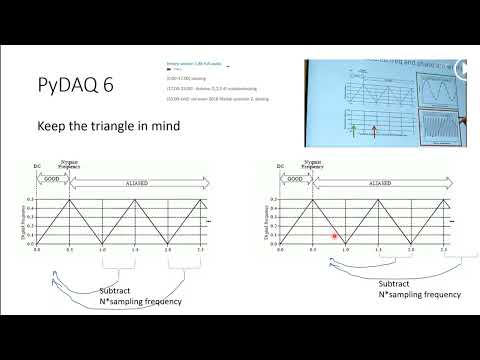

In [1]:
#precap
from IPython.lib.display import YouTubeVideo
YouTubeVideo('-ArD57-lLks', width = 600, height = 450)


In [ ]:
def calculate_measured_frequency( signal_frequency, sampling_rate):
    # first flip the input frequency into the range 0 till sampling rate. 
    # you can use the modulus (a%b), or a while loop (which is more risky if there is no proper ending criterium)
    ...
    if remainder < sampling_rate/2:
        return ...
    if remainder > sampling_rate/2:
        return ...
    # is there another if case?
    # return measured_frequency

In [ ]:
### TO DO="copy paste the above code and adapt"



In [ ]:
#this is testing code

import unittest

class TestCode(unittest.TestCase):

    def test_1_noAliasing(self):
        self.assertEqual(calculate_measured_frequency(5,50), 5)
        self.assertEqual(calculate_measured_frequency(20,50), 20)
        
    def test_2_oneFlip(self):
        self.assertEqual(calculate_measured_frequency(30,50), 20)
        self.assertEqual(calculate_measured_frequency(45,50), 5)

    def test_3_twoFlips(self):
        self.assertEqual(calculate_measured_frequency(55,50), 5)
        self.assertEqual(calculate_measured_frequency(70,50), 20)

    def test_4_threeFlips(self):
        self.assertEqual(calculate_measured_frequency(80,51), 22)
        self.assertEqual(calculate_measured_frequency(95,51), 7)
        
    def test_5_annihilation(self):
        self.assertEqual(calculate_measured_frequency(0,50), 0)
        self.assertEqual(calculate_measured_frequency(25,50), 0)
        self.assertEqual(calculate_measured_frequency(50,50), 0)
        self.assertEqual(calculate_measured_frequency(75,50), 0)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], 
                  verbosity=2, exit=False)

In [ ]:
for freq in range (250,3000, 250):
    print(freq, calculate_measured_frequency(freq,1000))
### TO DO= "Do these values make sense?"


## IMPLEMENT & INVESTIGATE 1: experimentally observe aliasing
> <font color='grey'>⏳ Estimated time: 30 min</font>

Now instead of simulating aliasing, you are going to create a analog signal which will get aliased. You will need a function generator, scope and the breakout box(DAQ).

Connect function generator to the scope and the breakout box and let the function generator produce a 100Hz sine with 1Vpp.

**Acquire 50 samples at an sampling frequency of 10 times the signal frequency, so 1kHz.**

**Hint**: Reuse the code from either Analog Input (7A) which runs with a single frequency, or the automated multi-frequency code from used for automated filter response (8A). Pay close attention to the sampling rate (both pieces of code), and to the signal frequency (for 8A).
Then apply you calculate_fft (from 7B), to find out what the frequency of the output signal is. 

Remember that you will have to use the desktop.

In [ ]:
### TO DO="your copy of the Analog Input code"


Adjust the scope settings such that the scope screen displays about the same image as on the panel. Also display the Fourier domain on the scope screen.



In [ ]:
# your code for the acquisition, with correct nb of samples and sampling frequency
# remember to use calculate_fft


# up to you: you can make an acquisiion which you manually repeat, 
# or one, which you automatically update the freq in freq generator 

# you might want to use triggering don't forget to connect the SYNC from the freq generator: 
# task.triggers.start_trigger.cfg_dig_edge_start_trig(trigger_source = "/Dev1/PFI0", trigger_edge = Edge.RISING)

#  plt.clf() # clears figure, handy if you want to rewrite the same figure in a loop over&over again
# the combination fig= plt.figure(1) and fig.canvas.draw(), actually allows you to update the figure (for example while running a loop)

# place %matplotlib notebook or  %matplotlib inline a line before import matplotlib.pyplot as plt. 
# then the same figure is reused as interactive plot

# with Pillow you can automatically save images: plt.savefig('image'+str(set_freq)+'.jpg')
# if receiving an error, do pip install Pillow in an Anaconda command window

### TO DO="do some troubleshooting, work together, and if needed ask a TA for help"


Now, increase the signal frequency (on the function generator) from 100 Hz in steps of 100 Hz to 1100 Hz, **while keeping the sampling rate 1 kHz**. So don't change your code (other than the input frequency), and just rerun the code. 

Make sure to have enough periods measured. Plot the frequency spectra, save and upload those spectra for 600, 900 and 1100 Hz. 

In [ ]:
# your answer: Save and upload the Python graphs for 600, 900 and 1100 Hz.
# hint: use plt.subplots, get them in one screen, then screendump or combine them into one picture using a graphical programe
from ipywidgets import FileUpload
from IPython.display import Image
import os
upload=FileUpload()
upload


In [ ]:
file_name="8B_3_aliased600-900-1100.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
# other option to save the figure direclty: 
plt.savefig('8B_aliased_image.jpg') # automatically save with Pillow (pip install Pillow )


## IMPLEMENT & INVESTIGATE 2: observe fourier spectrum and frequency on data from 8A
> <font color='grey'>⏳ Estimated time: 20 min</font>

Use your fft function (that you already copied above) to calculate the observed frequency and how its fourier spectrum looks. How do you anticipate *function generator's frequency* vs *observed frequency* plot will look? Will it be linear? 


Write a function *extract_fft_values*, which extracts the amplitude and the measured frequency from a signal. Inputs are frequency axis and Fourier transform (the output of your calculate_fft).

First use it on `# test` to see if it works correctly and then run it on 8A data. (or "old_data" if you cannot get your 8A data to work)
> ###  <font color='blue'>Hint:</font>
> * use the output of calculate_fft
> * remove the amplitude at f=0 (DC offset)
> * find the location of the maximum intensity
> * find the corresponding frequency, and store it as meas_freq

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def extract_fft_values (measurement2, sample_rate):
    DFT_frequencies,DFT_plot=calculate_fft(measurement2, rate=sample_rate)
### TO DO='your code to derive Vout2'
    
    return Vout2, meas_freq[0]


# test
Nsamples = 80
max_time=2
rate=Nsamples/max_time
time = np.linspace(0,max_time,Nsamples)
voltage = 0.95 * np.sin( 12.0 * 2.0 * np.pi * time) + 1.3 * np.sin( np.pi * 2.0 * np.pi * time) + 0.65
DFT_frequencies,DFT_plot=calculate_fft(voltage, rate=rate)
plt.plot(DFT_frequencies,DFT_plot)

print(extract_fft_values(voltage, Nsamples/max_time)) 
# not that due to the discrete sampling of the freuqency axis you will not exactly find amplitude 1.3 at frequency 3.14 Hz


In [ ]:
''' tmp=np.load(r'data_week_8A.npz') # or old_data
dt, sample_rate, Vout, frequency, data = tmp['arr_0'],tmp['arr_1'],tmp['arr_2'],tmp['arr_3'], tmp['arr_4'] '''

dt=       np.load(r'data_week_8A_dt.npy')
sampling_rate=np.load(r'data_week_8A_sampling_rate.npy') #might need to rename
Vout=     np.load(r'data_week_8A_Vout.npy')
frequency=np.load(r'data_week_8A_frequency.npy')
data=     np.load(r'data_week_8A_data.npy')

# check which type of saveing you did in 8A
meas_freq=np.zeros(len(frequency))
for ii in range (len(frequency)):
    measurement2=data[:,ii]
    Vout[ii], meas_freq[ii]= extract_fft_values (measurement2, sample_rate)
    

plt.subplot(1,2,1), plt.plot(frequency, Vout )
plt.subplot(1,2,2), plt.plot(frequency, meas_freq )
plt.xlabel('Frequency (Hz)')
plt.ylabel('measured frequency (Hz)')
plt.grid()
plt.savefig('image.jpg') # automatically save with Pillow (pip install Pillow )

In [ ]:
### TO DO="What do you see? Is it linear?"


In [ ]:
### TO DO="explain the phase of 8.4 kHz sampled with 4.8 kHz"


## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 20 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**
1. Explain why the measured signal by DAQ and scope differ (I&I 1) 
2. In case the graph of measured and input signal was not a straight line (I&I 2), explain the differences and similarity between input signal and measured signal 
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [ ]:
#8B aliase single sine
### TO DO = "1. Explain why the measured signal by DAQ and scope differ (I&I 1) "

### TO DO = " 2. explain the differences and similarity between input signal and measured signal "

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


In [ ]:
#recording about measurement in the classroom
from IPython.lib.display import YouTubeVideo
YouTubeVideo('6VI76soaRGU', width = 600, height = 450)


In [ ]:
#recording on how to calculate the frequency: only watch it after putting in considerable effort to write it yourself
from IPython.lib.display import YouTubeVideo
YouTubeVideo('6GvCF07sguI', width = 600, height = 450)
